### Climate Model Playbook

<p>
Mal Minhas, v0.1<br>
14.07.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 14.07.24. First version</li>
</ul>
</p>

### 1. Zero-Dimensional Energy Balance Model v1

A zero-dimensional **Energy Balance Model (EBM)** is a very simple toy for considering the temperature of the earth.  It considers two factors: 
1. The **energy in** which is the solar radiation (or flux) of the sun area-averaged over the surface of thea earth.  This area-average is called **insolation** or $Q$.
2. The **energy out** which is a combination of energy *reflected out* via the albedo effect which is about 30% of that incoming flux plus the energy *radiated out* by the earth as a black body.  Note that energy is radiated out as infrared.

The **Absorbed Shortwave Radiation (ASR)** is the part of the incoming sunlight that is not reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.  The **Outgoing Longwave Radiation (OLR)** is the rest of the incoming sunlight that is radiated back out into space.  The basic principle of the EBM is that ASR=OLR at energy equilibrium at which point we have an equilibrium temperature.

This most basic form of this model is covered in more detail [in this paper](http://dimacs.rutgers.edu/archive/MPE/Energy/DIMACS-EBM.pdf) and outlined in summary following YouTube video:

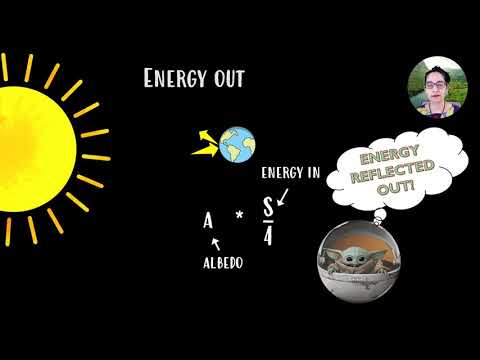

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('M_USJDCARrM', width=800, height=300)

The EBM equation is presented below along with some values.  The left hand side of the equation is energy in and the right hand side energy out.  Note that $S$ is solar flux in W/m$^2$, $α$ is albedo (reflectivity of earth), $T_s$ is equilibrium temperature at the surface of the earth in Kelvins and $σ$ is the [Stefan-Boltzmann constant](https://www.techtarget.com/whatis/definition/Stefan-Boltzmann-constant) which is:
> is a physical constant expressing the relationship between the heat radiation emitted by a black body and its absolute temperature

$S/4 = σT_s^4 + αS/4$

where:<br>
$α$ = 0.30<br>
$S$ = 1372 W/m$^2$<br>
$σ$ = 5.67x10$^{−8}$ W/m$^2$K$^4$

#### Question 1: Calculate $T_s$ in Kelvins for the given values of $α$, $S$ and $σ$

Let's use this to build an equation that solves for T$_s$ using the provided values:

In [2]:
α = 0.30
S = 1372 
σ = 5.67e-8

In [3]:
T = ((S/4 - α * S/4)/σ) ** (1./4.)
print(f"Equilibrium surface temperature T={round(T,2)}K")

Equilibrium surface temperature T=255.1K


#### Question 2: Convert $T_s$ from K to $^{o}$C

We're gonna use Gen AI to help with this:

In [4]:
%reload_ext jupyter_ai

In [5]:
%%ai claude-3-sonnet-20240229 -f code
Write a Python function called kelvin_to_celcius to convert temperature in Kelvin to temperature in degrees centrigrade

In [6]:
def kelvin_to_celsius(temp_kelvin):
    temp_celsius = temp_kelvin - 273.15
    return temp_celsius

In [7]:
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

255.1K = -18.05 degrees C


This figure is much lower than the observed temperature on earth which is around 288K.  Why the difference?  Our toy model doesn't account the presence of **greenhouse gases (GHGs)** such as CO$_2$, O$_3$ and NO$_2$ in our atmosphere.  Although they constitute only 1% of the atmosphere, they absorb 90% of the outgoing radiation and bounce it back to earth helping to keep the earth warmer than it would otherwise be. 

### 2. Zero-Dimensional Energy Balance Model v2 - adding GHG contribution factor

The [notebook here](https://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/Lectures/Lecture06%20--%20Elementary%20greenhouse%20models.html) provides a starting point for modelling the contribution of greenhouse gases. The basic idea is that we need to adjust our model to allow for the fact that not all the black body radiation makes it back out into space.  Some of it is absorbed within the atmosphere by greenhouse gases.  A very simple way to model that is to introduce a new factor $\tau$ that reduces the black body radiation factor in the equation as illustrated next.  Note we have reordered the terms so that the right hand side is now the ASR or total proportion of solar flux that is absorbed and the right hand side is OLR or total terrestrial radiation emitted back into space.  Per guidance above, the basic principal of EBM is that ASR=OLR.

$(1- α)Q = \tau \sigma T_s^4$

where:<br>
$Q$ = $S/4$ or **insolation**<br>
$\tau$ = transmissivity<br>

We observe $\tau$ to be around 0.61 derived from an observed value of T$_s$ of 288K.  Let's plug that value in and recalcuate T$_s$:

In [8]:
τ = 0.61

def ASR(α, S):
    return (1-α) * S/4

def equilibrium_temperature(asr, τ, σ):
    return (asr/(τ * σ)) ** (1./4.)

T = equilibrium_temperature(ASR(α, S), τ, σ)
print(f"Equilibrium surface temperature T={round(T,2)}K")
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

Equilibrium surface temperature T=288.65K
288.65K = 15.5 degrees C


Can we do better than a $\tau$ fudge factor reverse-engineered from observation?  As outlined [here](https://github.com/brian-rose/ClimateModeling_courseware/blob/master/Lectures/Lecture07%20--%20Elementary%20greenhouse%20models.ipynb) we can model the atmosphere from first principles as a single layer under the following assumptions:
* The atmosphere is a single layer of air at temperature T$_a$
* The atmosphere is completely transparent to shortwave solar radiation.
* The surface absorbs shortwave radiation (1-α)Q
* The atmosphere is completely opaque to infrared radiation
* Both surface and atmosphere emit radiation as blackbodies ($\sigma T_s^4$, $\sigma T_a^4$)
* Atmosphere radiates equally up and down ($\sigma T_a^4$)
* There are no other heat transfer mechanisms

<div>
<img src="simpleGHGmodel.png" width="600"/>
</div>

Here $\sigma T_a^4$ pointing downwards constitutes the **downwelling or back radiation** from the atmosphere.  We know from energy balance that the blackbody radiation at the surface $\sigma T_s^4$ must equal the sum of the blackbody radiation in the atmosphere 2$\sigma T_a^4$.  We can use this to simplify the equilibrium energy equation at the surface as follows:

$(1- α)Q + \sigma T_a^4 = \sigma T_s^4$

where:<br>
$\sigma T_a^4 = \frac{1}{2}\sigma T_s^4$

therefore:
$(1- α)Q = \frac{1}{2} \sigma T_s^4$

Note this is exactly the same as having a $\tau$ of 0.5 which yields the expected 303K:

In [9]:
T = equilibrium_temperature(ASR(α, S), 0.5, σ)
print(f"Equilibrium surface temperature T={round(T,2)}K")
print(f"{round(T,2)}K = {round(kelvin_to_celsius(T),2)} degrees C")

Equilibrium surface temperature T=303.36K
303.36K = 30.21 degrees C


We have now overshot by some 15 $^o$C.  The reasons why are because our assumptions were not valid:
* The atmosphere absorbs some solar radiation.
* The atmosphere is NOT a perfect absorber of longwave radiation
* Absorption and emission varies strongly with wavelength and the atmosphere does not behave like a blackbody.
* Emissions are not determined by a single temperature T$_a$ but by the detailed vertical profile of air temperture.
* Energy is redistributed in the vertical by a variety of dynamical transport mechanisms (e.g. convection and boundary layer turbulence).

Lots of refinements are possible to a zero-dimensional EBM to model for dynamic change through feedback.  See [this lecture](https://florianboergel.github.io/climateoftheocean/2020-11-11-energy-model.html) for more detail on ways to do this.

### 3. Radiative Forcing